# Thông tin sinh viên

- MSSV: 19120688
- Họ và tên: Đỗ Nhật Toàn

# Chuẩn bị

## Import các thư viện

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Test data

In [ ]:
data = pd.read_csv('./ToyotaCorolla.csv', header=0)
data = data.dropna()

In [ ]:
data.shape

In [ ]:
data.head()

# Hãy trực quan hóa các thông tin thống kê mô tả cho các biến

## Khai báo danh sách thuộc tính

In [ ]:
atr_list = ['Price', 'Age', 'Kilometers', 'Fuel_Type', 'HP', 'Metallic', 'Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
numeric_list = ['Price', 'Age', 'HP', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
categorical_list = ['Fuel_Type', 'Metallic', 'Automatic', 'Color']

## Biểu đồ box plot thể hiện thông tin thống kê mô tả của các thuộc tính numeric

Descriptive statistics information of Price
count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64


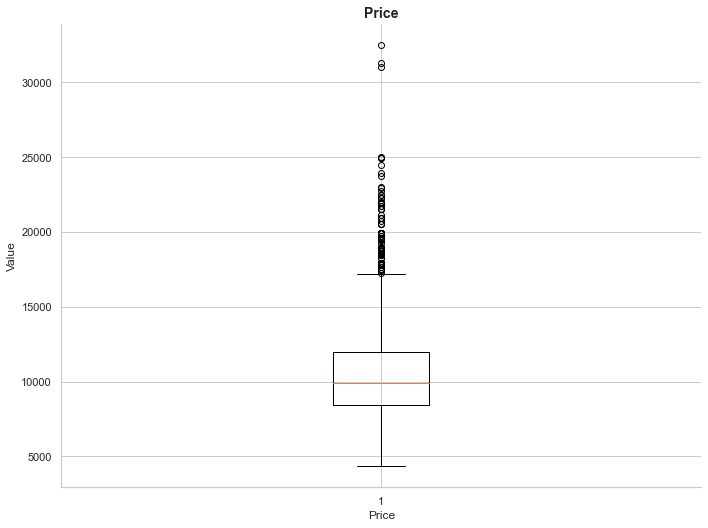

Descriptive statistics information of Age
count    1436.000000
mean       55.947075
std        18.599988
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64


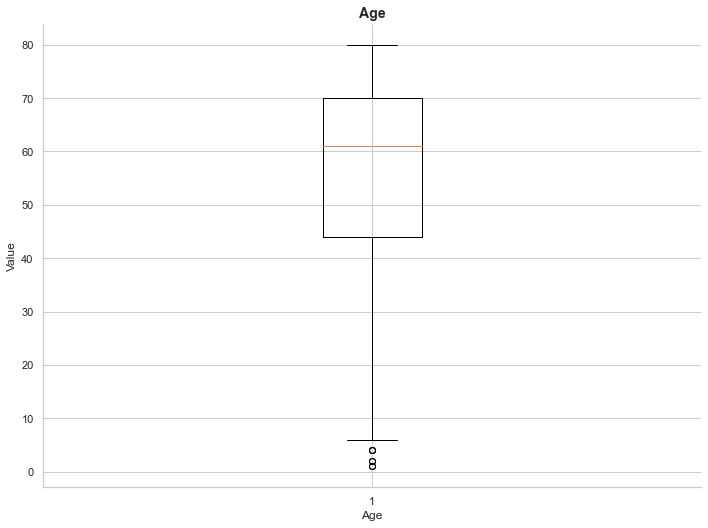

Descriptive statistics information of HP
count    1436.000000
mean      101.502089
std        14.981080
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64


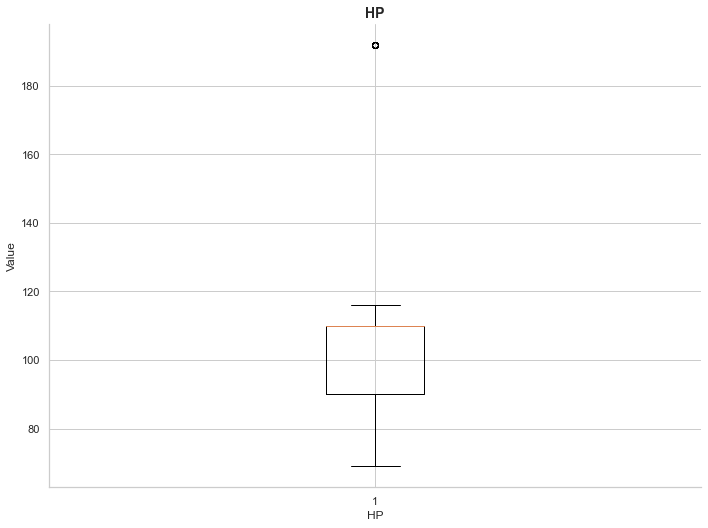

Descriptive statistics information of CC
count     1436.00000
mean      1576.85585
std        424.38677
min       1300.00000
25%       1400.00000
50%       1600.00000
75%       1600.00000
max      16000.00000
Name: CC, dtype: float64


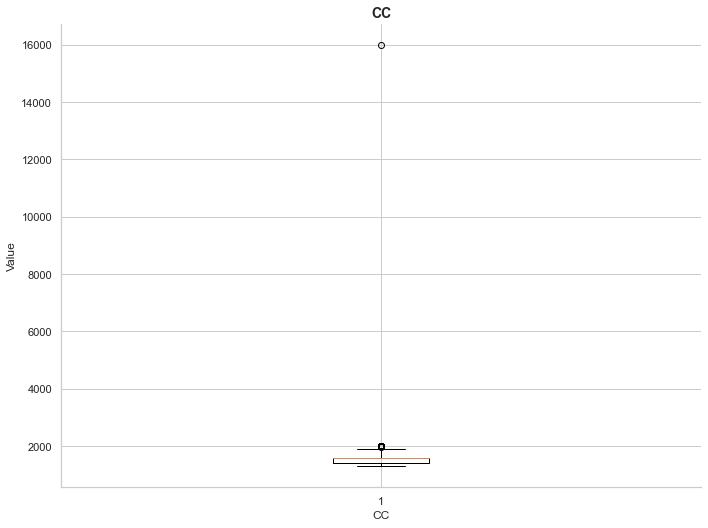

Descriptive statistics information of Doors
count    1436.000000
mean        4.033426
std         0.952677
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Doors, dtype: float64


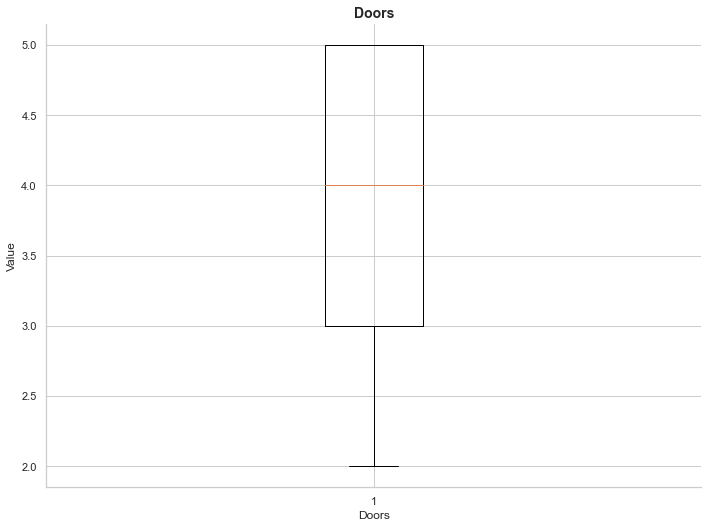

Descriptive statistics information of Quarterly_Tax
count    1436.000000
mean       87.122563
std        41.128611
min        19.000000
25%        69.000000
50%        85.000000
75%        85.000000
max       283.000000
Name: Quarterly_Tax, dtype: float64


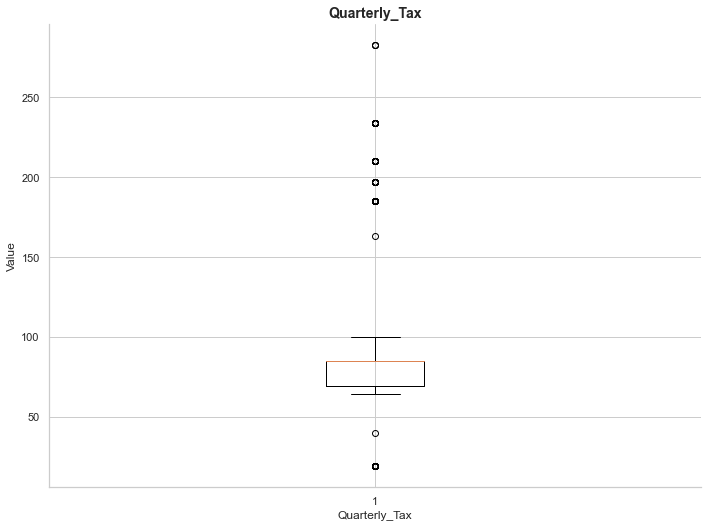

Descriptive statistics information of Weight
count    1436.00000
mean     1072.45961
std        52.64112
min      1000.00000
25%      1040.00000
50%      1070.00000
75%      1085.00000
max      1615.00000
Name: Weight, dtype: float64


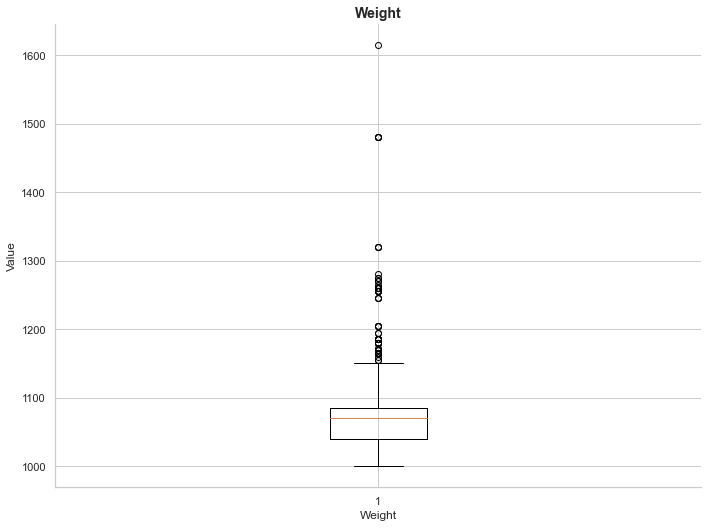

In [38]:
for x in numeric_list:
    print("Descriptive statistics information of", x)
    print(data[x].describe())
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True) 
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    p = plt.boxplot(data[x])
    plt.title(x, fontsize=14, fontweight='bold')
    plt.xlabel(x)
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

## Biểu đồ pie chart thể hiện thông tin của các thuộc tính categorical

In [ ]:
colors = sns.color_palette('pastel')
for x in categorical_list[:-1]:
    fig_obj = plt.figure(figsize=(10, 7.5))
    fig_obj.set_facecolor('white')
    value = data[x].value_counts()
    label = data[x].unique().tolist()  
    ax = plt.subplot(111)
    plt.title(x, fontsize=14, fontweight='bold')
    plt.pie(value, colors=colors,autopct='%.0f%%', startangle=90, wedgeprops = {"edgecolor" : "black",
                        'linewidth': 0.3,
                        'antialiased': True})
    plt.legend(label,loc=1)
    plt.tight_layout()
    plt.show()

In [ ]:
fig_obj = plt.figure(figsize=(10, 7.5))
fig_obj.set_facecolor('white')
value = data['Color'].value_counts()
label = data['Color'].unique().tolist()
ax = plt.subplot(111)
plt.title('Color', fontsize=14, fontweight='bold')
plt.pie(value, colors=label, startangle=90, wedgeprops = {"edgecolor" : "grey",
                      'linewidth': 0.5,
                      'antialiased': True})
plt.legend(label, bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có)

<AxesSubplot:>

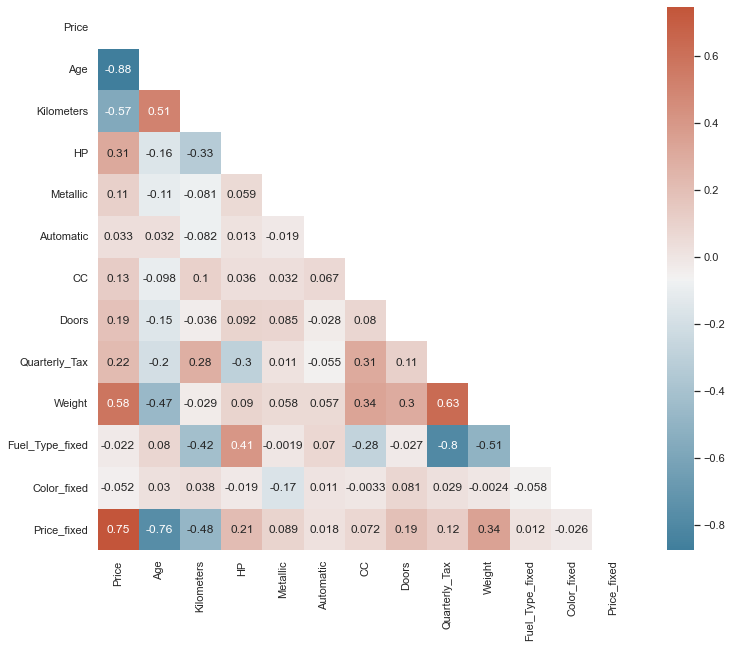

In [35]:
corr = data.corr(method="pearson")
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Weight vs. Quarterly_Tax

Correlation matrix:
 [[1.         0.62613373]
 [0.62613373 1.        ]]


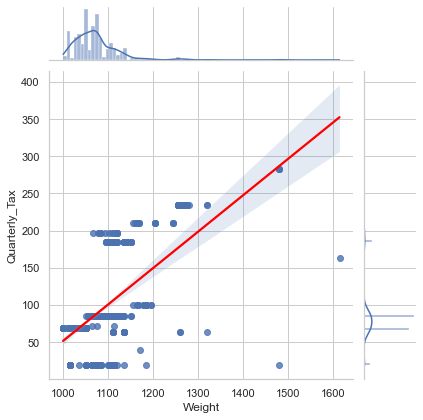

In [39]:
print("Correlation matrix:\n", np.corrcoef(data['Weight'], data['Quarterly_Tax']))
a = sns.jointplot(x="Weight",y="Quarterly_Tax", data=data, kind='reg')
regline = a.ax_joint.get_lines()[0]
regline.set_color('red')

## Weight vs. Price

In [ ]:
print("Correlation matrix:\n", np.corrcoef(data['Weight'], data['Price']))
b = sns.jointplot(x="Weight",y="Price", data=data, kind='reg')
regline = b.ax_joint.get_lines()[0]
regline.set_color('red')

## Age vs. Kilometers

In [ ]:
print("Correlation matrix:\n", np.corrcoef(data['Age'], data['Kilometers']))
c = sns.jointplot(x="Age",y="Kilometers", data=data, kind='reg')
regline = c.ax_joint.get_lines()[0]
regline.set_color('red')

## Age vs. Price

Correlation matrix:
 [[ 1.        -0.8765905]
 [-0.8765905  1.       ]]


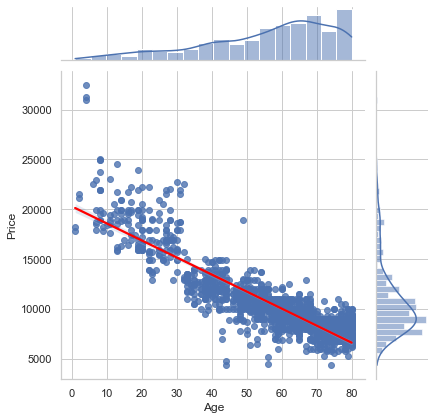

In [36]:
print("Correlation matrix:\n", np.corrcoef(data['Age'], data['Price']))
c = sns.jointplot(x="Age",y="Price", data=data, kind='reg')
regline = c.ax_joint.get_lines()[0]
regline.set_color('red')

## Kilometers vs. Price

Correlation matrix:
 [[ 1.         -0.56996016]
 [-0.56996016  1.        ]]


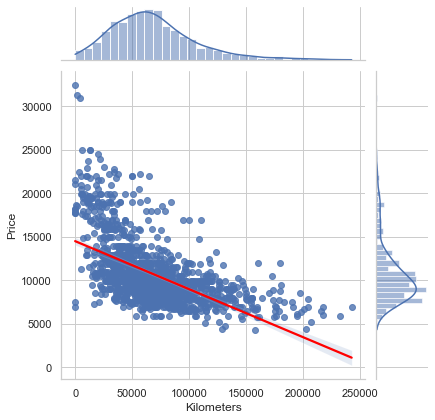

In [37]:
print("Correlation matrix:\n", np.corrcoef(data['Kilometers'], data['Price']))
c = sns.jointplot(x="Kilometers",y="Price", data=data, kind='reg')
regline = c.ax_joint.get_lines()[0]
regline.set_color('red')

# Hãy trực quan hóa biểu đồ histogram cho `Price` theo từng biến biến theo `Fuel_type` và `Color`



## Price và Fuel_type

In [ ]:
list_fuel_type = data.Fuel_Type.unique()
for x in list_fuel_type:
    temp = data[data["Fuel_Type"]==x]
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    sns.histplot(data=temp.Price, kde=True, edgecolor='black')
    plt.title("Price of "+ str(x), fontsize=14, fontweight='bold')
    plt.xlabel("Price of "+ str(x))
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

## Price và Colors

In [ ]:
list_color = data.Color.unique()
for x in list_color:
    temp = data[data["Color"]==x]
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax = sns.histplot(data=temp.Price, kde=True, color=x, edgecolor='black')
    ax.lines[0].set_color('crimson')
    plt.title("Price of "+ str(x), fontsize=14, fontweight='bold')
    plt.xlabel("Price of "+ str(x))
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Hãy đưa ra mô hình dự báo về giá xe `Price` (có thể sử dụng mô hình hồi quy logistic hoặc mô hình học máy bất kỳ)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

enc = OrdinalEncoder()
data["Fuel_Type_fixed"] = enc.fit_transform(data[["Fuel_Type"]])
data["Color_fixed"] = enc.fit_transform(data[["Color"]])
price_mean = data["Price"].sum()/data.shape[0]
def convert_price(cell):
    return 1 if cell >= price_mean else 0
data = data.assign(Price_fixed = data.Price.apply(convert_price))

In [ ]:
data.head()

In [ ]:
feature_cols = ['Age', 'Kilometers', 'Fuel_Type_fixed', 'HP', 'Metallic', 'Color_fixed', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
X = data[feature_cols]
y = data.Price_fixed

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
cmx = confusion_matrix(y_test, y_pred)
cmx

In [ ]:
print("Accuracy =", accuracy_score(y_test,y_pred))